In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
TRAIN_DATASET_PATH = './Choose Tutors/train.csv'
TEST_DATASET_PATH = './Choose Tutors/test.csv'

In [10]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

In [11]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [12]:
df_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [13]:
round((len(df_train) - df_train.count()) / len(df_train) * 100, 2).sort_values(ascending=False)

choose                 0.0
mean_exam_points       0.0
history                0.0
geography              0.0
english                0.0
biology                0.0
chemistry              0.0
physics                0.0
qualification          0.0
lesson_price           0.0
years_of_experience    0.0
age                    0.0
Id                     0.0
dtype: float64

In [14]:
df_train.nunique().sort_values(ascending=False)

Id                     10000
lesson_price              71
mean_exam_points          68
age                       46
years_of_experience       10
qualification              4
choose                     2
history                    2
geography                  2
english                    2
biology                    2
chemistry                  2
physics                    2
dtype: int64

In [15]:
TARGET_NAME = 'choose'

In [16]:
df_train[TARGET_NAME].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [17]:
FEATURE_NAMES = df_train.columns.drop([TARGET_NAME, 'Id']).tolist()

In [18]:
NUM_FEATURE_NAMES = ['lesson_price', 'mean_exam_points', 'age', 'years_of_experience']

In [19]:
CAT_FEATURE_NAMES = [item for item in FEATURE_NAMES if item not in NUM_FEATURE_NAMES]

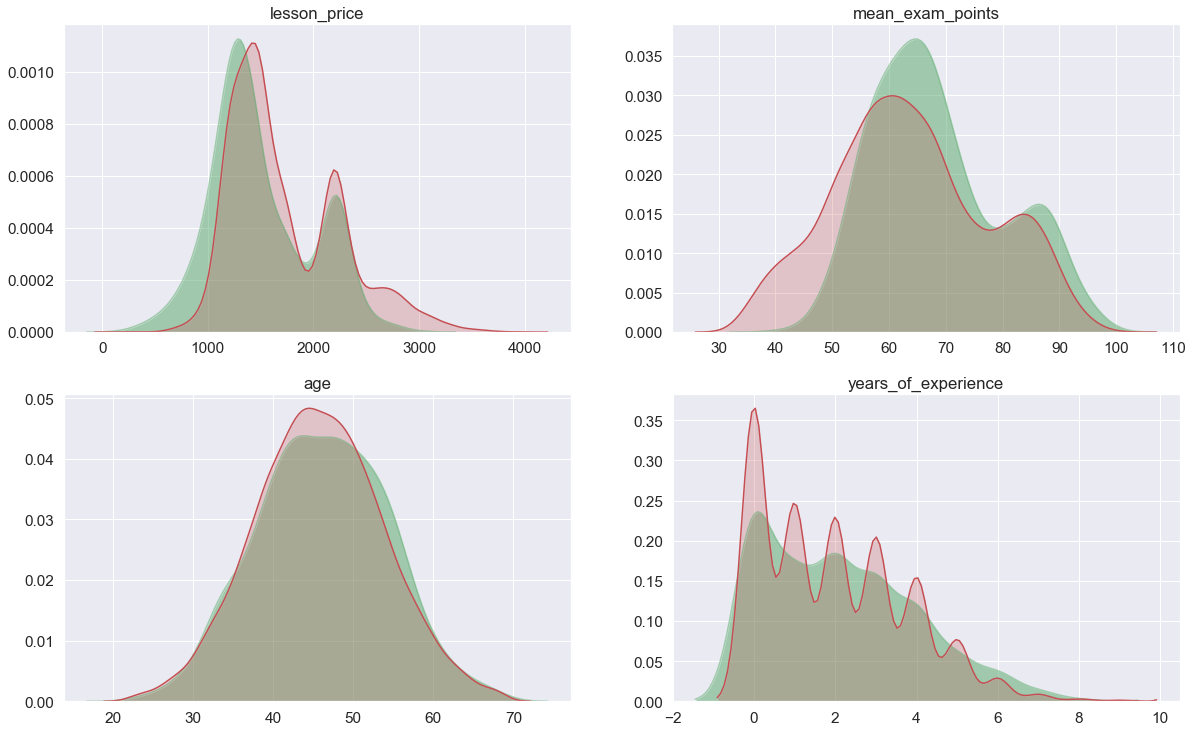

In [20]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,60))

for i, colname in enumerate(NUM_FEATURE_NAMES):
    plt.subplot(9,2,i+1)
    plt.title(colname)
    sns.kdeplot(df_train.loc[df_train[TARGET_NAME] == 1, colname].dropna(), shade=True, alpha=0.5, legend=False, color='g')
    sns.kdeplot(df_train.loc[df_train[TARGET_NAME] == 0, colname].dropna(), shade=True, legend=False, color='r')
    
plt.show()

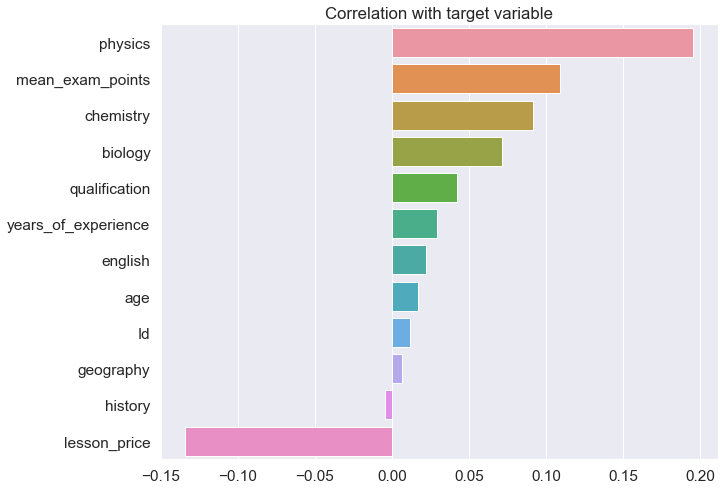

In [21]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

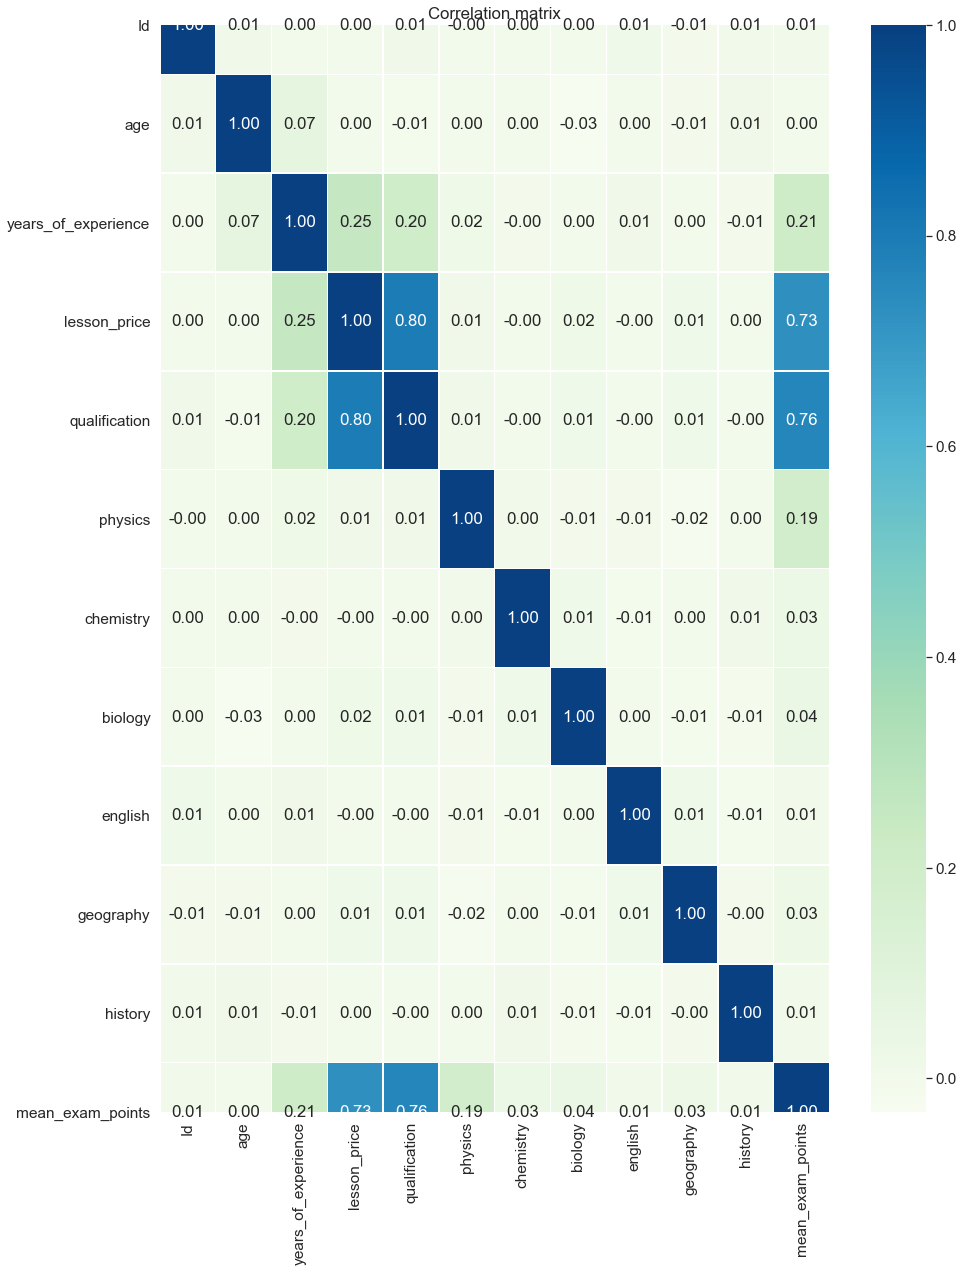

In [22]:
plt.figure(figsize=(15,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train.drop(columns=TARGET_NAME).corr(), annot=True, linewidths=0.5, cmap='GnBu', fmt='.2f')

plt.title('Correlation matrix')
plt.show()

In [23]:
"""
Так как добавление новых признаков не дает улучшения результата, удаляю код.
for i in range(len(NUM_FEATURE_NAMES)):
    for j in range(len(NUM_FEATURE_NAMES)):
        if i != j:
            col_name = NUM_FEATURE_NAMES[j] +' / '+ NUM_FEATURE_NAMES[i]
            col_value = df_train[NUM_FEATURE_NAMES[j]] / df_train[NUM_FEATURE_NAMES[i]]
            df_train[col_name] = col_value
            
        if j > i:
            col_name = NUM_FEATURE_NAMES[j] +' * '+ NUM_FEATURE_NAMES[i]
            col_value = df_train[NUM_FEATURE_NAMES[j]] * df_train[NUM_FEATURE_NAMES[i]]
            df_train[col_name] = col_value
"""

"\nТак как добавление новых признаков не дает улучшения результата, удаляю код.\nfor i in range(len(NUM_FEATURE_NAMES)):\n    for j in range(len(NUM_FEATURE_NAMES)):\n        if i != j:\n            col_name = NUM_FEATURE_NAMES[j] +' / '+ NUM_FEATURE_NAMES[i]\n            col_value = df_train[NUM_FEATURE_NAMES[j]] / df_train[NUM_FEATURE_NAMES[i]]\n            df_train[col_name] = col_value\n            \n        if j > i:\n            col_name = NUM_FEATURE_NAMES[j] +' * '+ NUM_FEATURE_NAMES[i]\n            col_value = df_train[NUM_FEATURE_NAMES[j]] * df_train[NUM_FEATURE_NAMES[i]]\n            df_train[col_name] = col_value\n"

In [24]:
"""
corr_with_target = df_train[df_train.columns[1:]].corr()['choose'][:].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()
"""

"\ncorr_with_target = df_train[df_train.columns[1:]].corr()['choose'][:].sort_values(ascending=False)\n\nplt.figure(figsize=(10, 8))\n\nsns.barplot(x=corr_with_target.values, y=corr_with_target.index)\n\nplt.title('Correlation with target variable')\nplt.show()\n"

In [25]:
X = df_train.drop(columns=[TARGET_NAME, 'Id'])
y = df_train[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=21)

In [26]:
def balance_df_by_target(df, target_name, balancing_type='oversampling'):
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()
    
    if balancing_type == 'oversampling':
        
        disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)

        return df.sample(frac=1) 
    
    if balancing_type == 'undersampling':
        
        major_class_sample = df[df[target_name] == major_class_name].sample(target_counts[minor_class_name])
        minor_class_sample = df[df[target_name] == minor_class_name]
        
        df = pd.concat([major_class_sample, minor_class_sample], ignore_index=True)
        
        return df.sample(frac=1) 

In [27]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME, balancing_type='oversampling')
    
df_balanced[TARGET_NAME].value_counts()

C:\Users\alibe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.
C:\Users\alibe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """


0    6218
1    5474
Name: choose, dtype: int64

In [28]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [29]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = np.random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [30]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    np.random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [31]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [32]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [33]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [34]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [35]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [36]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [37]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [38]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [39]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [40]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [41]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [42]:
# Введем функцию подсчета точности как доли правильных ответов

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [43]:
X_train_n = X_train.to_numpy()

In [44]:
y_train_n = y_train.to_numpy()

In [45]:
%%time
n_trees = 10
my_forest = random_forest(X_train_n, y_train_n, n_trees)

Wall time: 1h 12min 46s


In [46]:
train_answers = tree_vote(my_forest, X_train_n)

In [47]:
X_test_n = X_test.to_numpy()

In [48]:
test_answers = tree_vote(my_forest, X_test_n)

In [49]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train_n, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

Точность случайного леса из 10 деревьев на обучающей выборке: 89.446


In [50]:
y_test_n = y_test.to_numpy()

In [51]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test_n, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 10 деревьев на тестовой выборке: 82.233


In [52]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [53]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [54]:
"""
for i in range(len(NUM_FEATURE_NAMES)):
    for j in range(len(NUM_FEATURE_NAMES)):
        if i != j:
            col_name = NUM_FEATURE_NAMES[j] +' / '+ NUM_FEATURE_NAMES[i]
            col_value = df_test[NUM_FEATURE_NAMES[j]] / df_test[NUM_FEATURE_NAMES[i]]
            df_test[col_name] = col_value
            
        if j > i:
            col_name = NUM_FEATURE_NAMES[j] +' * '+ NUM_FEATURE_NAMES[i]
            col_value = df_test[NUM_FEATURE_NAMES[j]] * df_test[NUM_FEATURE_NAMES[i]]
            df_test[col_name] = col_value
"""

"\nfor i in range(len(NUM_FEATURE_NAMES)):\n    for j in range(len(NUM_FEATURE_NAMES)):\n        if i != j:\n            col_name = NUM_FEATURE_NAMES[j] +' / '+ NUM_FEATURE_NAMES[i]\n            col_value = df_test[NUM_FEATURE_NAMES[j]] / df_test[NUM_FEATURE_NAMES[i]]\n            df_test[col_name] = col_value\n            \n        if j > i:\n            col_name = NUM_FEATURE_NAMES[j] +' * '+ NUM_FEATURE_NAMES[i]\n            col_value = df_test[NUM_FEATURE_NAMES[j]] * df_test[NUM_FEATURE_NAMES[i]]\n            df_test[col_name] = col_value\n"

In [55]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [56]:
df_test_cl = df_test.copy()

In [57]:
test_data = df_test_cl.drop(columns='Id')

In [58]:
test_data_n = test_data.to_numpy()

In [59]:
test_ans = tree_vote(my_forest, test_data_n)

In [60]:
df_test[TARGET_NAME] = test_ans

In [61]:
df_test[TARGET_NAME].value_counts()

0.0    8157
1.0    1843
Name: choose, dtype: int64

In [62]:
df_test.loc[:, ['Id', TARGET_NAME]].to_csv('AKudaibergenov_predictions.csv', sep = ',', index=None)